# **Ocean Dataset for depths: 10, 80, and 250m**

In this colab notebook we work with the ocean salinity and temperature depths dataset found on https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_temp_salinity

To try to seperate the work and creating all these plots as efficent ever notebook focuses on 3 different depths. This notebook focues of 10, 80, and 250m. Here we create a plot of the mean temperature and salinity throughout the months and years in our ROI. We also have created a gif that allows us to better understand the temperature and salinity change and how it compares to other features that are looked at. The method done for this is the similar to all the other ways graphs and gifs were generated. 

# **Necessary Downloads**

In [ ]:
pip install geemap

     |████████████████████████████████| 450kB 5.8MB/s 
     |████████████████████████████████| 1.2MB 18.6MB/s 
     |████████████████████████████████| 1.6MB 19.6MB/s 
     |████████████████████████████████| 1.3MB 33.4MB/s 
     |████████████████████████████████| 143kB 38.5MB/s 
     |████████████████████████████████| 225kB 31.4MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 5.1MB 43.2MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 552kB 36.3MB/s 
     |████████████████████████████████| 122kB 20.0MB/s 
     |████████████████████████████████| 378kB 30.4MB/s 
     |████████████████████████████████| 122kB 41.0MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=d6caf68ca9174be74b638e659515b

In [ ]:
import tensorflow as tf

# check that a GPU is enabled
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!earthengine authenticate


Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=ecxBX5C1SAuJSq537jYDvjJwvEjn7IIySTS0NYN9amc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4PmEX9x6p0_N-oy63h7LfQM6H4bg35iSdt7_HgJc4Ct3eaPVBHdyo

Successfully saved authorization token.


In [ ]:
!pip install earthengine-api
!pip install folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ee
import geemap
ee.Initialize()

import matplotlib.pyplot as plt
import numpy as np

# **Getting the Geometry**

In [ ]:
#from class
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

jsonFile = '/content/drive/My Drive/ECE471/Final_Project/map.geojson'

with open(jsonFile, 'r') as file:
  jsonLoad = json.load(file)

geometry = jsonLoad['features'][0]['geometry']

In [ ]:
geometry

{'coordinates': [[[-75.146484375, 32.32427558887655],
   [-9.31640625, 32.32427558887655],
   [-9.31640625, 46.49839225859763],
   [-75.146484375, 46.49839225859763],
   [-75.146484375, 32.32427558887655]]],
 'type': 'Polygon'}

In [ ]:
#reverse geometry
geometryRev = geometry

latMin = geometryRev['coordinates'][0][0][0]
longMin = geometryRev['coordinates'][0][0][1]

latMax = geometryRev['coordinates'][0][2][0]
longMax = geometryRev['coordinates'][0][2][1]

geometryRev['coordinates'][0][0][0] = longMin
geometryRev['coordinates'][0][0][1] = latMin

geometryRev['coordinates'][0][1][0] = longMin
geometryRev['coordinates'][0][1][1] = latMax

geometryRev['coordinates'][0][2][0] = longMax
geometryRev['coordinates'][0][2][1] = latMax

geometryRev['coordinates'][0][3][0] = longMax
geometryRev['coordinates'][0][3][1] = latMin

geometryRev['coordinates'][0][4][0] = longMin
geometryRev['coordinates'][0][4][1] = latMin

In [ ]:
geometryRev

{'coordinates': [[[32.32427558887655, -75.146484375],
   [32.32427558887655, -9.31640625],
   [46.49839225859763, -9.31640625],
   [46.49839225859763, -75.146484375],
   [32.32427558887655, -75.146484375]]],
 'type': 'Polygon'}

# **Depth 10m**

In [ ]:
from datetime import datetime, timedelta

In [ ]:
years = [2014,2015,2016]
days_aggregate = 30
day_step = 7

In [ ]:
sd_2014_10 = datetime(years[0], month=1, day=1)
ed_2014_10 = sd_2014_10 + timedelta(days=days_aggregate)

sd_2015_10 = datetime(years[1], month=1, day=1)
ed_2015_10 = sd_2015_10 + timedelta(days=days_aggregate)

sd_2016_10 = datetime(years[2], month=1, day=1)
ed_2016_10 = sd_2016_10 + timedelta(days=days_aggregate)

In [ ]:
wt10_2014 = list()
wt10_2015 = list()
wt10_2016 = list()

s10_2014 = list()
s10_2015 = list()
s10_2016 = list()

dates = list()

In [ ]:
aoi = ee.Geometry(geometry)
ic_wt10 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('water_temp_10')
ic_s10 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('salinity_10')

In [ ]:
sd_2014_10 = '2014-01-01'
ed_2014_10 = '2014-12-31'

sd_2015_10 = '2015-01-01'
ed_2015_10 = '2015-12-31'

sd_2016_10 = '2016-01-01'
ed_2016_10 = '2016-12-31'

In [ ]:
ic_wt2014 = ic_wt10.filterDate(sd_2014_10, ed_2014_10)
ic_s2014 = ic_s10.filterDate(sd_2014_10, ed_2014_10)

ic_wt2015 = ic_wt10.filterDate(sd_2015_10, ed_2015_10)
ic_s2015 = ic_s10.filterDate(sd_2015_10, ed_2015_10)

ic_wt2016 = ic_wt10.filterDate(sd_2016_10, ed_2016_10)
ic_s2016 = ic_s10.filterDate(sd_2016_10, ed_2016_10)

In [ ]:
def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.mean(), geometry)
    
    return image.set(dict)

#withMean = collection.map(setProperty)

In [ ]:
mean_spatial_2014_wt = ic_wt2014.map(setProperty)
mean_spatial_2014_s = ic_s2014.map(setProperty)

mean_spatial_2015_wt = ic_wt2015.map(setProperty)
mean_spatial_2015_s = ic_s2015.map(setProperty)

mean_spatial_2016_wt = ic_wt2016.map(setProperty)
mean_spatial_2016_s = ic_s2016.map(setProperty)

In [ ]:
wt10_2014 = mean_spatial_2014_wt.aggregate_array('water_temp_10').getInfo()
s10_2014 = mean_spatial_2014_s.aggregate_array('salinity_10').getInfo()

wt10_2015 = mean_spatial_2015_wt.aggregate_array('water_temp_10').getInfo()
s10_2015 = mean_spatial_2015_s.aggregate_array('salinity_10').getInfo()

wt10_2016 = mean_spatial_2016_wt.aggregate_array('water_temp_10').getInfo()
s10_2016 = mean_spatial_2016_s.aggregate_array('salinity_10').getInfo()

In [ ]:
wt10_2014 = np.array(wt10_2014)
wt10_2014 = (wt10_2014/1000) + 20
wt10_2014 = wt10_2014[:359] 

wt10_2015 = np.array(wt10_2015)
wt10_2015 = (wt10_2015/1000) + 20
wt10_2015 = wt10_2015[:359] 

wt10_2016 = np.array(wt10_2016)
wt10_2016 = (wt10_2016/1000) + 20
wt10_2016 = wt10_2016[:359] 

s10_2014 = np.array(s10_2014)
s10_2014 = (s10_2014/1000) + 20
s10_2014 = s10_2014[:359] 

s10_2015 = np.array(s10_2015)
s10_2015 = (s10_2015/1000) + 20
s10_2015 = s10_2015[:359] 

s10_2016 = np.array(s10_2016)
s10_2016 = (s10_2016/1000) + 20
s10_2016 = s10_2016[:359] 


In [ ]:
len(s10_2016)

359

In [ ]:
len(wt10_2014[:359])

359

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

In [ ]:
len(xlabel)

359

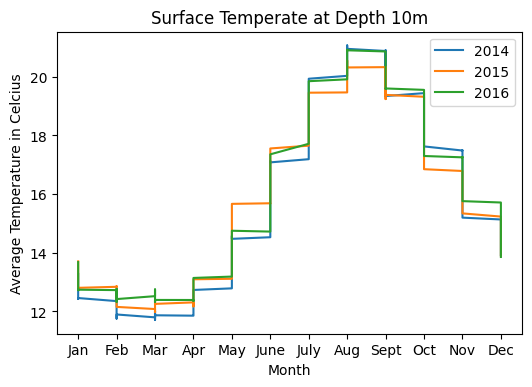

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, wt10_2014)
plt.plot(xlabel, wt10_2015)
plt.plot(xlabel, wt10_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celcius')
plt.title('Surface Temperate at Depth 10m')
plt.show()

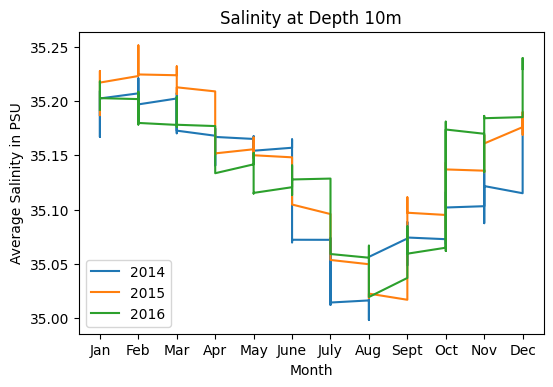

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, s10_2014)
plt.plot(xlabel, s10_2015)
plt.plot(xlabel, s10_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Salinity in PSU')
plt.title('Salinity at Depth 10m')
plt.show()

# **Depth 80m**

In [ ]:
aoi = ee.Geometry(geometry)
ic_wt80 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('water_temp_80')
ic_s80 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('salinity_80')

In [ ]:
ic_wt2014_80 = ic_wt80.filterDate(sd_2014_10, ed_2014_10)
ic_s2014_80 = ic_s80.filterDate(sd_2014_10, ed_2014_10)

ic_wt2015_80 = ic_wt80.filterDate(sd_2015_10, ed_2015_10)
ic_s2015_80 = ic_s80.filterDate(sd_2015_10, ed_2015_10)

ic_wt2016_80 = ic_wt80.filterDate(sd_2016_10, ed_2016_10)
ic_s2016_80 = ic_s80.filterDate(sd_2016_10, ed_2016_10)

In [ ]:
mean_spatial_2014_wt80 = ic_wt2014_80.map(setProperty)
mean_spatial_2014_s80 = ic_s2014_80.map(setProperty)

mean_spatial_2015_wt80 = ic_wt2015_80.map(setProperty)
mean_spatial_2015_s80 = ic_s2015_80.map(setProperty)

mean_spatial_2016_wt80 = ic_wt2016_80.map(setProperty)
mean_spatial_2016_s80 = ic_s2016_80.map(setProperty)

In [ ]:
wt80_2014 = mean_spatial_2014_wt80.aggregate_array('water_temp_80').getInfo()
s80_2014 = mean_spatial_2014_s80.aggregate_array('salinity_80').getInfo()

wt80_2015 = mean_spatial_2015_wt80.aggregate_array('water_temp_80').getInfo()
s80_2015 = mean_spatial_2015_s80.aggregate_array('salinity_80').getInfo()

wt80_2016 = mean_spatial_2016_wt80.aggregate_array('water_temp_80').getInfo()
s80_2016 = mean_spatial_2016_s80.aggregate_array('salinity_80').getInfo()

In [ ]:
wt80_2014 = np.array(wt80_2014)
wt80_2014 = (wt80_2014/1000) + 20
wt80_2014 = wt80_2014[:359] 

wt80_2015 = np.array(wt80_2015)
wt80_2015 = (wt80_2015/1000) + 20
wt80_2015 = wt80_2015[:359] 

wt80_2016 = np.array(wt80_2016)
wt80_2016 = (wt80_2016/1000) + 20
wt80_2016 = wt80_2016[:359] 

s80_2014 = np.array(s80_2014)
s80_2014 = (s80_2014/1000) + 20
s80_2014 = s80_2014[:359] 

s80_2015 = np.array(s80_2015)
s80_2015 = (s80_2015/1000) + 20
s80_2015 = s80_2015[:359] 

s80_2016 = np.array(s80_2016)
s80_2016 = (s80_2016/1000) + 20
s80_2016 = s80_2016[:359] 

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

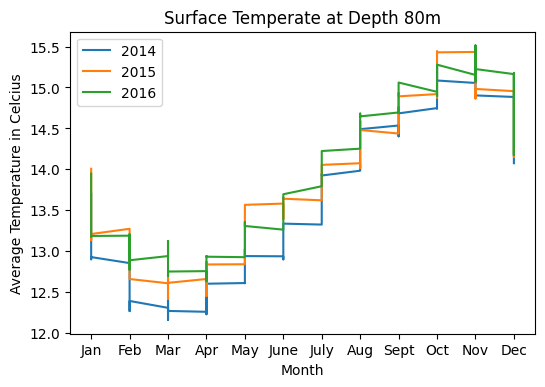

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, wt80_2014)
plt.plot(xlabel, wt80_2015)
plt.plot(xlabel, wt80_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celcius')
plt.title('Surface Temperate at Depth 80m')
plt.show()

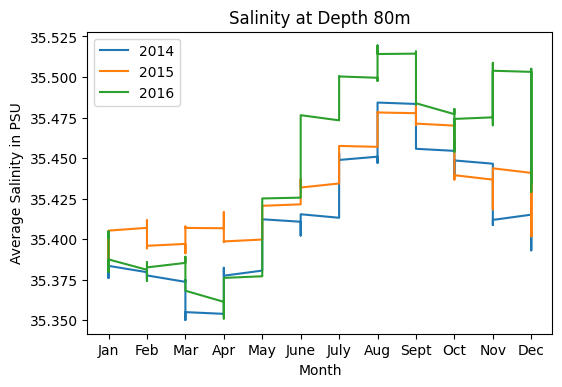

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, s80_2014)
plt.plot(xlabel, s80_2015)
plt.plot(xlabel, s80_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Salinity in PSU')
plt.title('Salinity at Depth 80m')
plt.show()

# **Depth 250m**

In [ ]:
aoi = ee.Geometry(geometry)
ic_wt250 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('water_temp_250')
ic_s250 = ee.ImageCollection('HYCOM/sea_temp_salinity').filterBounds(aoi).select('salinity_250')

In [ ]:
ic_wt2014_250 = ic_wt250.filterDate(sd_2014_10, ed_2014_10)
ic_s2014_250 = ic_s250.filterDate(sd_2014_10, ed_2014_10)

ic_wt2015_250 = ic_wt250.filterDate(sd_2015_10, ed_2015_10)
ic_s2015_250 = ic_s250.filterDate(sd_2015_10, ed_2015_10)

ic_wt2016_250 = ic_wt250.filterDate(sd_2016_10, ed_2016_10)
ic_s2016_250 = ic_s250.filterDate(sd_2016_10, ed_2016_10)

In [ ]:
ic_wt2014_250.size().getInfo()

363

In [ ]:
mean_spatial_2014_wt250 = ic_wt2014_250.map(setProperty)
mean_spatial_2014_s250 = ic_s2014_250.map(setProperty)

mean_spatial_2015_wt250 = ic_wt2015_250.map(setProperty)
mean_spatial_2015_s250 = ic_s2015_250.map(setProperty)

mean_spatial_2016_wt250 = ic_wt2016_250.map(setProperty)
mean_spatial_2016_s250 = ic_s2016_250.map(setProperty)

In [ ]:
wt250_2014 = mean_spatial_2014_wt250.aggregate_array('water_temp_250').getInfo()
s250_2014 = mean_spatial_2014_s250.aggregate_array('salinity_250').getInfo()

wt250_2015 = mean_spatial_2015_wt250.aggregate_array('water_temp_250').getInfo()
s250_2015 = mean_spatial_2015_s250.aggregate_array('salinity_250').getInfo()

wt250_2016 = mean_spatial_2016_wt250.aggregate_array('water_temp_250').getInfo()
s250_2016 = mean_spatial_2016_s250.aggregate_array('salinity_250').getInfo()

In [ ]:
wt250_2014 = np.array(wt250_2014)
wt250_2014 = (wt250_2014/1000) + 20
wt250_2014 = wt250_2014[:359] 

wt250_2015 = np.array(wt250_2015)
wt250_2015 = (wt250_2015/1000) + 20
wt250_2015 = wt250_2015[:359] 

wt250_2016 = np.array(wt250_2016)
wt250_2016 = (wt250_2016/1000) + 20
wt250_2016 = wt250_2016[:359] 

s250_2014 = np.array(s250_2014)
s250_2014 = (s250_2014/1000) + 20
s250_2014 = s250_2014[:359] 

s250_2015 = np.array(s250_2015)
s250_2015 = (s250_2015/1000) + 20
s250_2015 = s250_2015[:359] 

s250_2016 = np.array(s250_2016)
s250_2016 = (s250_2016/1000) + 20
s250_2016 = s250_2016[:359] 

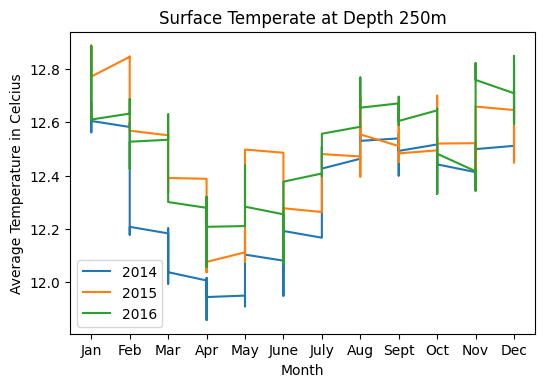

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, wt250_2014)
plt.plot(xlabel, wt250_2015)
plt.plot(xlabel, wt250_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celcius')
plt.title('Surface Temperate at Depth 250m')
plt.show()

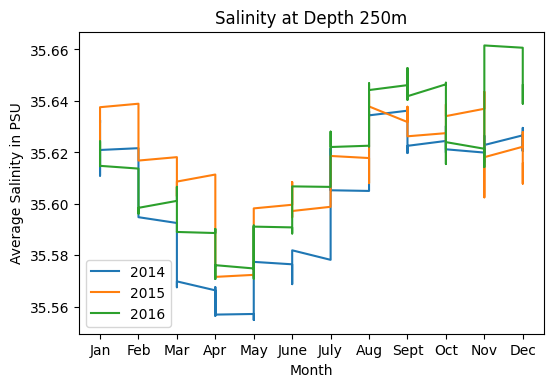

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, s250_2014)
plt.plot(xlabel, s250_2015)
plt.plot(xlabel, s250_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Salinity in PSU')
plt.title('Salinity at Depth 250m')
plt.show()